# Entitlements analysis on economies


In [20]:
import pandas as pd 
import collections as cTools
import itertools as iTools
import numpy as np
import plotly.graph_objects as go
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from plotly.subplots import make_subplots

In [21]:
# Load Data

populationOfElderly = pd.read_csv(r'C:\Hari\Q5_books\143\Project\entitlements\elderly.csv')
employmentRateByAgeGroup = pd.read_csv(r'C:\Hari\Q5_books\143\Project\entitlements\employmentRateByAgeGroup.csv')
publicExpenditure = pd.read_csv(r'C:\Hari\Q5_books\143\Project\entitlements\publicExpenditure.csv')

In [22]:
yearsToAnalyze = list(range(1950,2000,1))
countriesToAnalyze = ['ARG','BRA','CAN','CHN','COL','DEU','ISL','DNK','FIN','JPN','KOR','GBR','USA','SWE','NOR']
populationOfElderly = populationOfElderly.drop(columns=['FREQUENCY','SUBJECT','MEASURE','INDICATOR','Flag Codes'])
employmentRateByAgeGroup = employmentRateByAgeGroup.drop(columns=['FREQUENCY','SUBJECT','MEASURE','INDICATOR','Flag Codes'])
print(countriesToAnalyze)

['ARG', 'BRA', 'CAN', 'CHN', 'COL', 'DEU', 'ISL', 'DNK', 'FIN', 'JPN', 'KOR', 'GBR', 'USA', 'SWE', 'NOR']


In [23]:
# Population of Elderly Manipulation

populationOfElderly['LOCATION'] = pd.Categorical(populationOfElderly['LOCATION'])
populationOfElderly.set_index('LOCATION')
populationOfElderly = populationOfElderly.pivot_table(index='LOCATION', columns='TIME', values='Value', aggfunc='first')
populationOfElderly = populationOfElderly.drop(columns=yearsToAnalyze)
populationOfElderly = populationOfElderly[populationOfElderly.index.isin(countriesToAnalyze)]
populationOfElderly = populationOfElderly.iloc[:,::3]
print(populationOfElderly)

TIME           2000       2003       2006       2009       2012       2015  \
LOCATION                                                                     
ARG        9.395273   9.867974   9.970949  10.109265  10.354865  10.745288   
BRA        5.804594   6.217012   6.615944   7.110998   7.712468   8.409910   
CAN       12.550632  12.832472  13.259903  13.884860  14.849640  16.027370   
CHN        6.920629   7.502388   7.996802   8.450282   9.049303  10.020054   
COL        5.745680   6.057823   6.277187   6.575620   6.997463   7.485892   
DEU       16.448588  17.749502  19.525823  20.531015  20.713858  21.049280   
DNK       14.830054  14.886711  15.255548  16.106414  17.653195  18.735713   
FIN       14.917885  15.459015  16.234311  16.880979  18.450722  20.206941   
GBR       15.806451  15.912140  15.871640  16.176886  17.017410  17.833145   
ISL       11.574324  11.734860  11.631620  11.811894  12.783929  13.695446   
JPN       17.366895  19.050455  20.822066  22.748639  24.148134 

<AxesSubplot:xlabel='TIME', ylabel='LOCATION'>

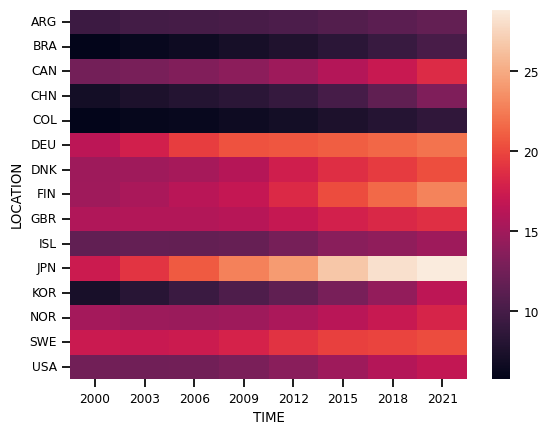

In [24]:
# Plot the graphs
sns.set_context("notebook", font_scale=0.8)
sns.heatmap(populationOfElderly)

In [25]:
# Working population Manipulation

yearsToAnalyze = list(range(1955,2000,1))
employmentRateByAgeGroup['LOCATION'] = pd.Categorical(employmentRateByAgeGroup['LOCATION'])
employmentRateByAgeGroup = employmentRateByAgeGroup.set_index('LOCATION')

employmentRateByAgeGroup['TIME'] = employmentRateByAgeGroup['TIME'].str.extract(r'(\d{4})').astype('int')
employmentRateByAgeGroup = employmentRateByAgeGroup.pivot_table(index='LOCATION', columns='TIME', values='Value', aggfunc='first')
employmentRateByAgeGroup = employmentRateByAgeGroup.drop(columns=yearsToAnalyze)
employmentRateByAgeGroup = employmentRateByAgeGroup[employmentRateByAgeGroup.index.isin(countriesToAnalyze)]
employmentRateByAgeGroup = employmentRateByAgeGroup.iloc[:,::3]
employmentRateByAgeGroup.fillna(method='bfill', inplace=True)
employmentRateByAgeGroup = employmentRateByAgeGroup.drop(columns=[2021])
employmentRateByAgeGroup = employmentRateByAgeGroup.transpose()
print(employmentRateByAgeGroup)

LOCATION       BRA       CAN       COL     DEU     DNK     FIN     GBR  \
TIME                                                                     
2000      56.23333  56.23333  65.97500  65.975  65.975  41.100  62.525   
2003      42.88126  58.15000  59.57500  59.575  59.575  39.625  61.075   
2006      44.27253  59.35833  43.52500  43.525  64.550  42.100  58.875   
2009      44.84620  56.41667  39.27500  45.375  58.750  39.100  52.200   
2012      46.73780  55.90000  43.84917  46.000  51.375  41.125  50.300   
2015      42.59475  57.13334  44.75667  44.700  51.350  39.975  54.050   
2018      57.90000  57.90000  42.07917  46.525  53.750  43.600  54.775   

LOCATION       ISL       JPN       KOR     NOR       SWE       USA  
TIME                                                                
2000      42.83065  42.83065  29.45086  57.675  59.65937  59.65937  
2003      67.35000  40.35870  30.97331  55.150  41.25000  53.90615  
2006      72.05000  41.32818  27.78982  52.425  40.27500 

In [26]:

fig = make_subplots(rows=len(employmentRateByAgeGroup.columns),cols=1)
r=1
c=1
for country in employmentRateByAgeGroup.columns:
    fig.add_trace(go.Scatter(x=employmentRateByAgeGroup.index, y=employmentRateByAgeGroup[country], name=country),row=r, col =c)
    r+=1
fig.update_layout(title='Aged working Population as a % of total working population', xaxis_title='Year', yaxis_title=' % of total working population')

fig.update_layout(
    paper_bgcolor = 'white',
    margin=dict(l=50, r=50, t=50, b=50), # Set the plot margins
    # Add a border to the plot area
    shapes=[
        dict(
            type='rect',
            xref='paper',
            yref='paper',
            x0=0,
            y0=0,
            x1=1,
            y1=1,
            line=dict(width=2, color='black')
        )
    ]
)
fig.update_layout(grid=dict(rows=5, columns=2))


fig.show()

In [27]:
# Expenditure manipulation
yearsToAnalyze = list(range(1955,2000,1))
publicExpenditure['LOCATION'] = pd.Categorical(publicExpenditure['LOCATION'])
publicExpenditure = publicExpenditure.set_index('LOCATION')
'''
publicExpenditure['TIME'] = publicExpenditure['TIME'].str.extract(r'(\d{4})').astype('int')
publicExpenditure = publicExpenditure.pivot_table(index='LOCATION', columns='TIME', values='Value', aggfunc='first')
publicExpenditure = publicExpenditure.drop(columns=yearsToAnalyze)
publicExpenditure = publicExpenditure[publicExpenditure.index.isin(countriesToAnalyze)]
publicExpenditure = publicExpenditure.iloc[:,::3]
publicExpenditure.fillna(method='bfill', inplace=True)
publicExpenditure = publicExpenditure.drop(columns=[2021])
publicExpenditure = publicExpenditure.transpose()
'''
print(publicExpenditure)

"\npublicExpenditure['TIME'] = publicExpenditure['TIME'].str.extract(r'(\\d{4})').astype('int')\npublicExpenditure = publicExpenditure.pivot_table(index='LOCATION', columns='TIME', values='Value', aggfunc='first')\npublicExpenditure = publicExpenditure.drop(columns=yearsToAnalyze)\npublicExpenditure = publicExpenditure[publicExpenditure.index.isin(countriesToAnalyze)]\npublicExpenditure = publicExpenditure.iloc[:,::3]\npublicExpenditure.fillna(method='bfill', inplace=True)\npublicExpenditure = publicExpenditure.drop(columns=[2021])\npublicExpenditure = publicExpenditure.transpose()\n"